In [ ]:
!pip install python-doc
!python3 -m pip install docx2txt
!pip install textract
!sudo apt-get install antiword
!pip install python-docx
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 39.7 MB 1.4 MB/s 
     |████████████████████████████████| 2.7 MB 59.0 MB/s 
     |████████████████████████████████| 100 kB 10.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 121 kB 76.3 MB/s 
     |████████████████████████████████| 90 kB 10.9 MB/s 
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 1.8.6
    Uninstalling Sphinx-1.8.6:
      Successfully uninstalled Sphinx-1.8.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=b2e94acbe2fa3ac9228eae37be52713ac0de056d766c1cfbd4cdce46ac1f8e4b
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 63.3 MB/s 
     |████████████████████████████████| 10.1 MB 3.3 MB/s 
     |████████████████████████████████| 103 kB 61.8 MB/s 
     |████████████████████████████████| 32.8 MB 93.6 MB/s 
     |████████████████████████████████| 69 kB 8.1 MB/s 
     |████████████████████████████████| 5.6 MB 58.3 MB/s 
     |████████████████████████████████| 2.3 MB 55.9 MB/s 
     |████████████████████████████████| 73 kB 3.1 MB/s 
     |████████████████████████████████| 128 kB 58.1 MB/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 128 kB of archives.
After this operation, 633 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 antiword amd64 0.37-11build1 [128 kB]
Fetched 128 kB in 1s (132 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-pre

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
from docx import Document
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 18.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
os.listdir('/content/drive/MyDrive/Resumes')

['React Developer_Kamalakar Reddy.docx',
 'React Developer_Thirupathiamma.docx',
 'Reactjs Developer_M Lokesh.docx',
 'React Dev_Krishna Kanth.docx',
 'Internship_Ravali_Musquare Technologies (1).docx',
 'React Developer_Deepakreddy.docx',
 'React JS Developer_KotaniDurgaprasad[3_1] (1)-converted.docx',
 'React Developer_Vinay Reddy.doc',
 'React Developer_Haripriya.docx',
 'React Developer_Sarala Madasu-converted.docx',
 'Reactjs Developer_Ranga Gaganam_Musquare Technologies.docx',
 'React JS Developer_AnjaniPriyadarshini.doc',
 'React Dev_Krishna Kanth_Musquare Technologies.docx',
 'Reactjs Developer_MD Khizaruddin Rauf _Musquare Technologies.docx',
 'Reactjs Developer_Pranish Sonone_Musquare Technologies.docx',
 'Reactjs Developer_Shaik Abdul Sharuk_Musquare Technologies.docx',
 'Internship_Susovan Bag_Musquare Technologies.docx',
 'React Developer_Pragnya.docx',
 'React Developer_Naveen sadhu.docx',
 'React JS Developer_Venkatalakshmi (1)-converted.docx',
 'Reactjs Developer_M Loke

In [ ]:
file_path = []
category = []

In [ ]:
directory = '/content/drive/MyDrive/Resumes'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [ ]:
file_path, category

(['KAMALAKAR REDDY. A \n\nLinked In: https://www.linkedin.com/in/kamalakar-reddy-777682196/ \n\nPROFESSIONAL SUMMARY \n\n● 3 years of experience in UI Development of Enterprise Applications, Web Applicationsrelated technologies. \n\n● Experience in Development, Coding, Maintenance,Design, Implementation of Web applications using HTML5, CSS3, JavaScript, j Query, React JS, Redux. \n\n● Well versed in designing websites, Web Applications. \n\n● Well versed in different Project Management Tools e.g. JIRA, GIT, Bit bucket. ● Tested cross browser design issues and fixed major layout bugs for supported browsers. ● Self-motivated with good communication and interpersonalskills. \n\n● Ability to work independently and multitasking without negative impact to timelines orquality. \n\nWORK EXPERIENCE \n\nMARCH 2021 – TILL DATE \n\nROLE : : UI DEVELOPER \n\nENLUME TECHNOLOGIES, HYDERABAD. \n\nAUGUST 2018 – MARCH 2021 \n\nROLE : SOFTWARE ENGINEER \n\nFORTUNAPIX PRIVATE LIMITD, HYDERABAD. \n\nPROJEC

In [ ]:
file_path_1 = []
category_1 = []

In [ ]:
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft Resume')

In [ ]:
file_path_1, category_1

(['\nRahul Ahuja\n----------------------------------------------------------------------------\n-----------------------------------------------\nSummary:\n\n    • 10.2 years of experience in PeopleSoft as a Technical Consultant.\n    • Customization of  PeopleSoft  application  using  PeopleSoft  8.x,9.x,\n      People Tools.\n    •  In-depth  knowledge  in  PeopleTools   like   Application   Designer,\n      PeopleCode, Application Engine, Application Package, PS Security, File\n      layout,  XML  Publisher,  Data  Mover,  Integration  Broker,  Workflow\n      Notification, AWE, Web Services.\n    • Worked extensively on Application  Engine,  PeopleCdoe,  File  Layout,\n      Application Package, AWE, Env Refresh and Upgrade activities.\n    • Experience in Implementation of projects.\n    • Fair Knowledge in PeopleSoft Reporting Tools such as PS/Query.  Worked\n      on Component Interface.\n    • Excellent knowledge in Agile Methodology.\n    • Self motivated person with  strong  d

In [ ]:
file_path_2 = []
category_2 = []

In [ ]:
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resume')

In [ ]:
file_path_2, category_2

(['\n                                       SQL SERVER DEVELOPER\n\n\nPriyanka L\n\n\n\n\n\nProfessional summary:\n\n2.5 Years of Total Experience in MICROSOFT SQL SERVER development and\n1 year of experience in SSIS.\n\n\nKey highlights:\n\n    • Strong Knowledge in SQL COMMANDS like (DDL, DML, DCL, TCL) Operators.\n    • Strong Knowledge on SQL JOINS, SET OPERATORS and CONSTRAINTS.\n    • Good Knowledge on  STRING FUNCTIONS, DATE FUNCTIONS,\nAGGREGATE FUNCTIONS and RANK FUNCTIONS.\n    • Extensive experience with SQL Server in constructing  SUBQUERIES,\n      COMMON TABLE EXPRESSIONS (CTE), RECURSIVE CTE, TEMP TABLES, TABLE\n      VARIABLES, VIEWS with proper naming convention.\n    • Good Experience in T-SQL Concepts STOREDPROCEDURES, USER DEFINED\n      FUNCTIONS.\n    • Good Knowledge on  SQL TRIGGERS (FOR TRIGGERS AND INSTEAD OF TRIGGERS)\n    •  Knowledge on TCL and ERROR HANDLING.\n    • Good Experience in creating INDEXES and PERFORMANCE TUNING.\n    • Good Knowledge on WHILE 

In [ ]:
file_path_3 = []
category_3 = []

In [ ]:
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')

In [ ]:
file_path_3, category_3

(['\nVenkateswarlu.B                                          Workday  Consultant\n\n\n\n\n\n\n\n\n\n\n  • Having 5.3 years of experience in IT in which 3+ years of experience  in\n    implementations and Maintaining Workday HCM Reporting and Integrations.\n  • Experience in one full life cycle implementation of Workday and played a\n    key  role  as  Integration  Developer.  Must  have  hands  on  technical\n    experience  with  Workday  HCM  suite   (including   custom   reporting,\n    calculated fields, XSLT, Workday Studio, Workday Security etc.)\n  • Strong exposure in all phases of the  Workday  implementation  lifecycle\n    namely  -  Requirement  gathering,  Analysis,  Design,  Development  and\n    Testing.\n  • Hands  on  experience  in  inbound/  outbound  integrations  using  core\n    connector, Workday studio,  BIRT,  EIB,  business  processes,  Security,\n    report writer etc.\n  • Expertise in developing Payroll interfaces  using  PICOF/PECI  with  the\n    help of

In [ ]:
data = pd.DataFrame(data = file_path , columns = ['Resumes'])

In [ ]:
data['category'] = category
data

,Resumes,category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
4,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
5,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
7,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume
8,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React JS Developer Resume
9,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer Resume


In [ ]:
data_1 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_1['category_1'] = category_1
data_1

,Resumes,category_1
0,\nRahul Ahuja\n-------------------------------...,PeopleSoft Resume
1,\n\nR Ahmed\n PeopleS...,PeopleSoft Resume
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft Resume
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft Resume
4,"\nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...",PeopleSoft Resume
5,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft Resume
6,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft Resume
7,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,PeopleSoft Resume
8,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft Resume
9,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft Resume


In [ ]:
data_2 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_2['category_2'] = category_2
data_2

,Resumes,category_2
0,\n SQL S...,SQL Developer Lightning Insight Resume
1,\n\nCareer objective\n\n\nA rewarding opportun...,SQL Developer Lightning Insight Resume
2,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resume
3,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer Lightning Insight Resume
4,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
5,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resume
6,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
7,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resume
8,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
9,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume


In [ ]:
data_3 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_3['category_3'] = category_3
data_3

,Resumes,category_3
0,\nVenkateswarlu.B ...,Workday Resume
1,G Himaja\n\n ...,Workday Resume
2,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday Resume
3,\n[pic] Name...,Workday Resume
4,\nHarikrishna Akula\n\n\n\n Summary:\n ❖ 5....,Workday Resume
5,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume
6,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
7,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
8,Workday HCM Techno functional Consultant ...,Workday Resume
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume


In [ ]:
df = data.append([data_1, data_2, data_3], ignore_index = True)

In [ ]:
df

,Resumes,category,category_1,category_2,category_3
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,NaN,NaN,NaN
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
4,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,\n Hari Krishna ...,NaN,NaN,NaN,Workday Resume
75,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resume
76,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,NaN,NaN,NaN,Workday Resume
77,Name : Gopi Krishna Reddy\n\n\t\t ...,NaN,NaN,NaN,Workday Resume


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category    24 non-null     object
 2   category_1  20 non-null     object
 3   category_2  14 non-null     object
 4   category_3  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [ ]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,\n Hari Krishna ...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,\n\n Madeeswar A\n...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,Name : Gopi Krishna Reddy\n\n\t\t ...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [ ]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)

In [ ]:
df

,Resumes,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
4,Name: Ravali P \n\n\n\n ...,React JS Developer Resume
...,...,...
74,\n Hari Krishna ...,Workday Resume
75,\n\n Madeeswar A\n...,Workday Resume
76,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday Resume
77,Name : Gopi Krishna Reddy\n\n\t\t ...,Workday Resume


In [ ]:
df.head()

,Resumes,Category
0,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React JS Developer Resume
1,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer Resume
2,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer Resume
3,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
4,Name: Ravali P \n\n\n\n ...,React JS Developer Resume


In [ ]:
df.isna().count()

Resumes     79
Category    79
dtype: int64

In [ ]:
def preprocess(txt):
    txt = txt.lower()                                                             # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                           # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                          # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                               # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                                 # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                               # remove mentions
    txt = re.sub('\s+', ' ', txt)                                                 # remove extra whitespace
    txt = nltk.tokenize.word_tokenize(txt)                                        # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]     # remove stop words
    return ' '.join(txt)                                                          # stemming

In [ ]:
df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))

In [ ]:
df.to_csv('Resume.csv', index=False)

Exploratory Data Analysis

In [ ]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('studio', 128), ('core', 128), ('work', 124), ('custom', 124), ('js', 123

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


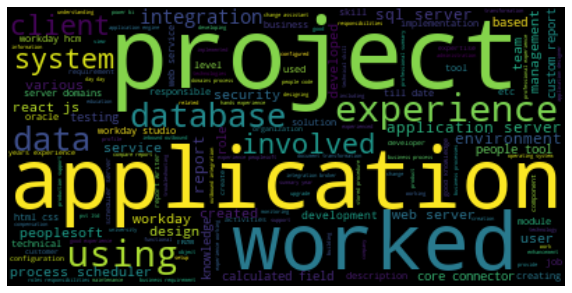

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
categories = np.sort(df['Category'].unique())
categories

array(['PeopleSoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [ ]:
df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories

[                                              Resumes           Category
 24  rahul ahuja summary years experience peoplesof...  PeopleSoft Resume
 25  r ahmed peoplesoft technical consultant profes...  PeopleSoft Resume
 26  murali professional summary years experience p...  PeopleSoft Resume
 27  peoplesoft admin varkala vikas career objectiv...  PeopleSoft Resume
 28  priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft Resume
 29  priyabrata hota career objective pursuing peop...  PeopleSoft Resume
 30  hari narayana professional summary years exper...  PeopleSoft Resume
 31  arun venu experience summary experience years ...  PeopleSoft Resume
 32  c n c address manyata tech park nagavara banga...  PeopleSoft Resume
 33  sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft Resume
 34  personal details name pritam biswas date birth...  PeopleSoft Resume
 35  peoplesoft administration vivekanand sayana ca...  PeopleSoft Resume
 36  profile summary years experience 

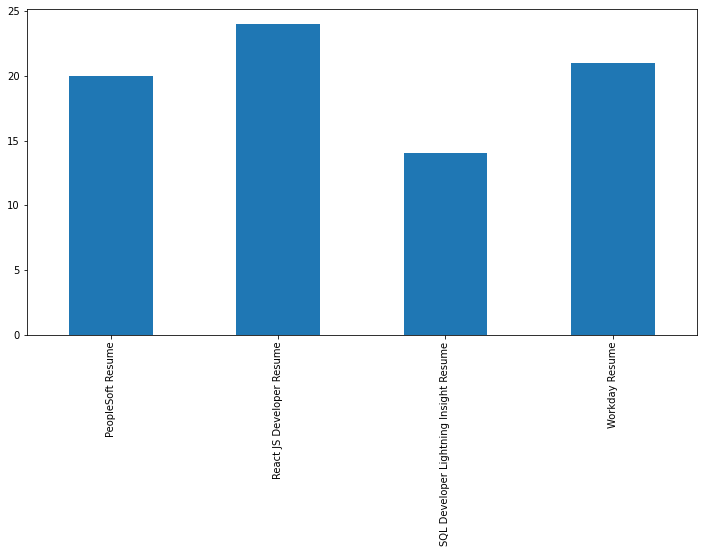

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [ ]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

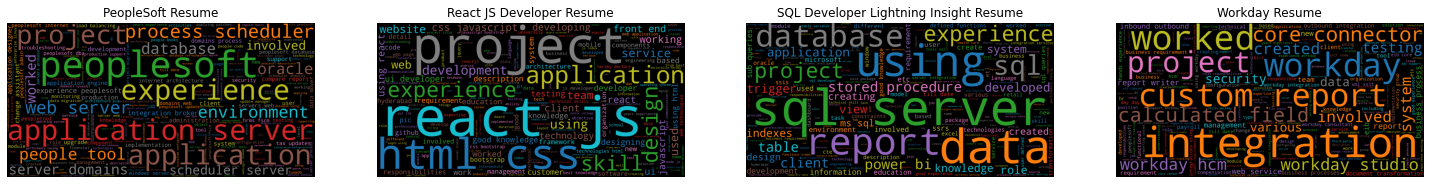

In [ ]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [ ]:
def wordfreq(df):
    count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

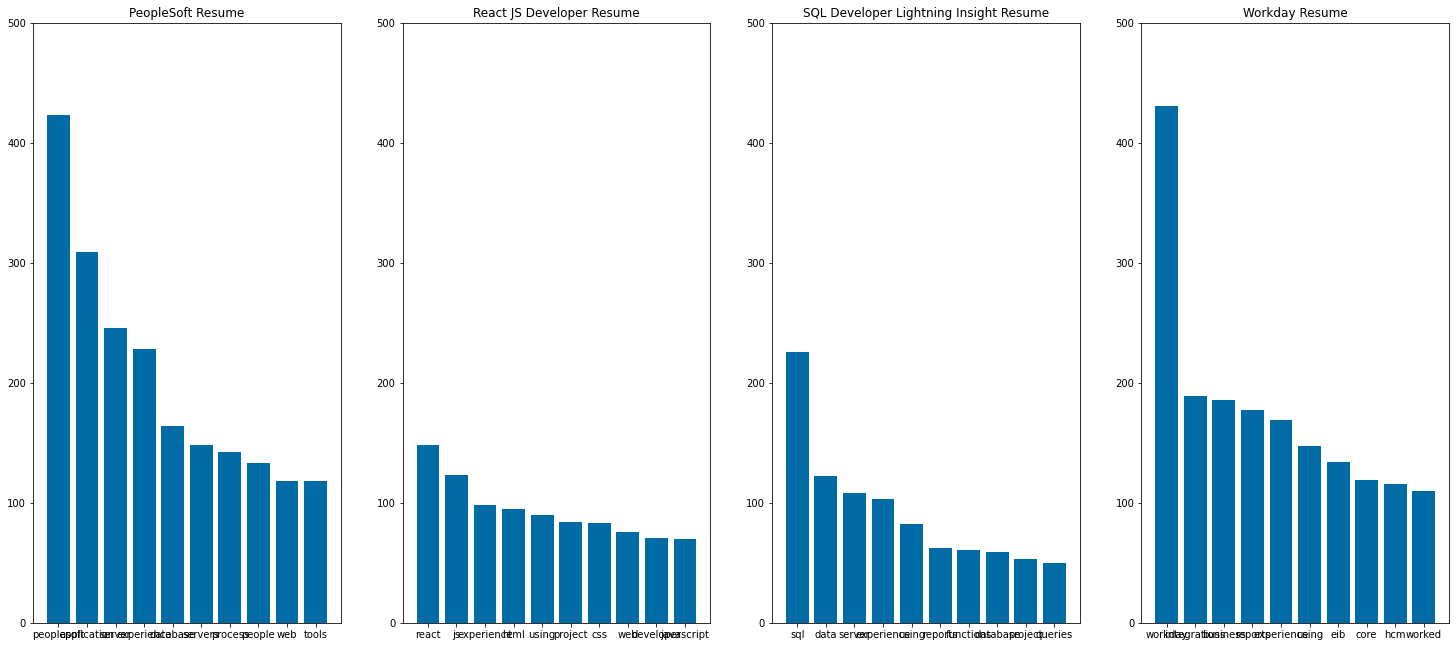

In [ ]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [ ]:
df

,Resumes,Category
0,kamalakar reddy linked www linkedin com kamala...,1
1,thirupathamma balla summary year experience re...,1
2,mareedu lokesh babu professional overview arou...,1
3,ui developer react js developer name krishna p...,1
4,name ravali p curriculum vitae specialization ...,1
...,...,...
74,hari krishna summary result oriented professio...,3
75,madeeswar profile summary around years experie...,3
76,pic pic years experience workday hcm technical...,3
77,name gopi krishna reddy professional summery w...,3


In [ ]:
df.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

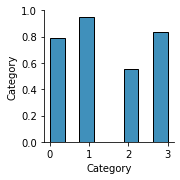

In [ ]:
import seaborn as sns
sns.pairplot(data = df)

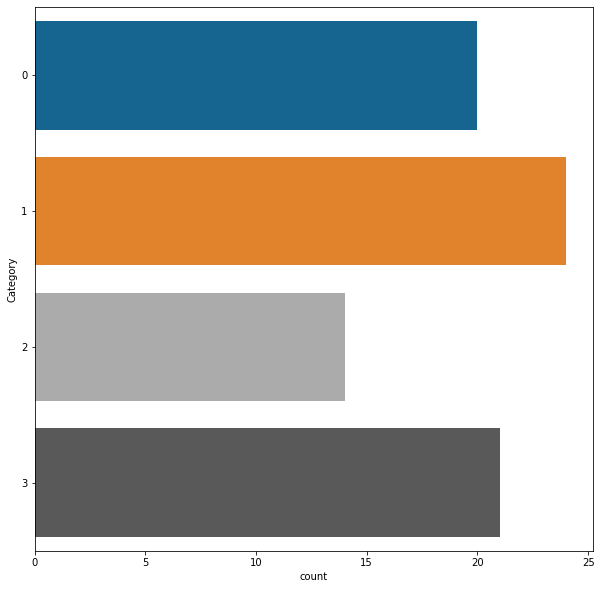

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=df)

In [ ]:
targetCounts = df['Category'].value_counts().reset_index()['Category']
targetLabels  = df['Category'].value_counts().reset_index()['index']

In [ ]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [ ]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

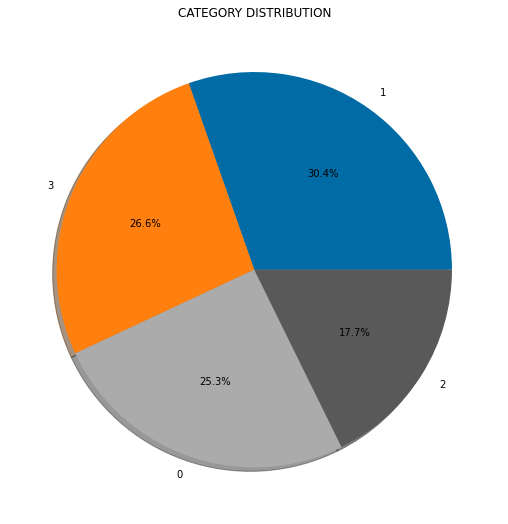

In [ ]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==wordfreqdist[i]):
        same=same+1
    elif(lem_words[i]!=wordfreqdist[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 1832
Number of words not Lemmatized= 0


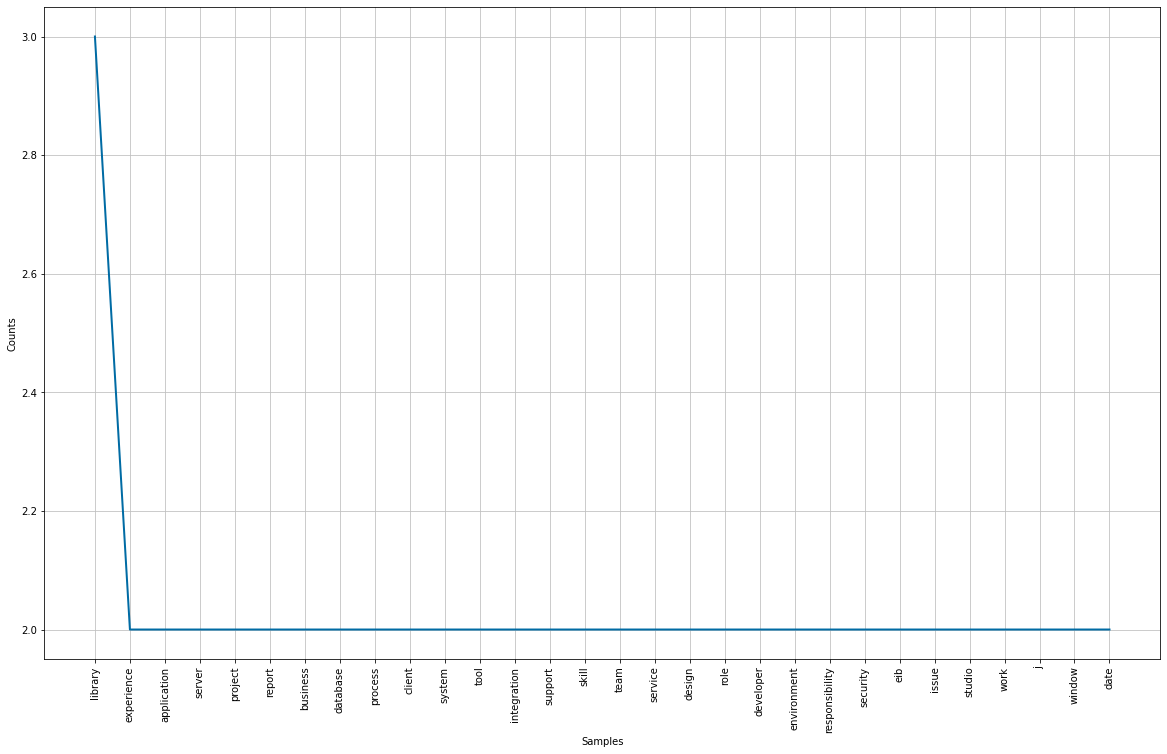

In [ ]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [ ]:
requiredText = df['Resumes'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=30, test_size=0.20, shuffle = True, stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4464), (16, 4464))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
prediction_1 = rf_clf.predict(X_test)
print('Accuracy of Decision Tree Classifier on training set: {:.4f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set    : {:.4f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 1.0000
Accuracy of Decision Tree Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for Decision Tree Classifier %s:\n%s\n" % (rf_clf, metrics.classification_report(y_test, prediction_1)))


 Classification report for Decision Tree Classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [ ]:
accuracy_1 = round(accuracy_score(y_test,prediction_1),4)
precision_1 = round(precision_score(y_test,prediction_1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,prediction_1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,prediction_1, average = 'macro'),4)

In [ ]:
print('Accuracy Score   : ', accuracy_1)
print('Precision Score  : ', precision_1)
print('Recall Score     : ', recall_1)
print('f1-Score         : ', f1_1)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_1))

Accuracy Score   :  1.0
Precision Score  :  1.0
Recall Score     :  1.0
f1-Score         :  1.0
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
prediction_2 = sv_clf.predict(X_test)
print('Accuracy of Support Vector Classifier on training set: {:.4f}'.format(sv_clf.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set    : {:.4f}'.format(sv_clf.score(X_test, y_test)))

Accuracy of Support Vector Classifier on training set: 1.0000
Accuracy of Support Vector Classifier on test set    : 0.9375


In [ ]:
print("\n Classification report for Support Vector Classifier %s:\n%s\n" % (sv_clf, metrics.classification_report(y_test, prediction_2)))


 Classification report for Support Vector Classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16




In [ ]:
accuracy_2 = round(accuracy_score(y_test,prediction_2),4)
precision_2 = round(precision_score(y_test,prediction_2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,prediction_2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,prediction_2, average = 'macro'),4)

In [ ]:
print('Accuracy Score   : ', accuracy_2)
print('Precision Score  : ', precision_2)
print('Recall Score     : ', recall_2)
print('f1-Score         : ', f1_2)
print('Confusion Matrix :\n',confusion_matrix(y_test,prediction_2))

Accuracy Score   :  0.9375
Precision Score  :  0.9583
Recall Score     :  0.9167
f1-Score         :  0.9273
Confusion Matrix :
 [[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
prediction_3 = nb_clf.predict(X_test)
print('Accuracy of Multinomial NB Classifier on training set: {:.4f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy of Multinomial NB Classifier on test set    : {:.4f}'.format(nb_clf.score(X_test, y_test)))

Accuracy of Multinomial NB Classifier on training set: 1.0000
Accuracy of Multinomial NB Classifier on test set    : 0.8750


In [ ]:
print("\n Classification report for Multinomial NB Classifier %s:\n%s\n" % (nb_clf, metrics.classification_report(y_test, prediction_3)))


 Classification report for Multinomial NB Classifier MultinomialNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      0.33      0.50         3
           3       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.92      0.83      0.82        16
weighted avg       0.92      0.88      0.86        16




In [ ]:
accuracy_3 = round(accuracy_score(y_test,prediction_3),4)
precision_3 = round(precision_score(y_test,prediction_3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,prediction_3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,prediction_3, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_3))

Accuracy Score  :  0.875
Precision Score :  0.9167
Recall Score    :  0.8333
f1-Score        :  0.825
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 1 2]
 [0 0 0 4]]


In [ ]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
prediction_4 = logistic_clf.predict(X_test)
print('Accuracy of Logistic Regression Classifier on training set: {:.4f}'.format(logistic_clf.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on test set    : {:.4f}'.format(logistic_clf.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training set: 1.0000
Accuracy of Logistic Regression Classifier on test set    : 0.9375


In [ ]:
print("\n Classification report for Logistic Regression Classifier %s:\n%s\n" % (logistic_clf, metrics.classification_report(y_test, prediction_4)))


 Classification report for Logistic Regression Classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16




In [ ]:
accuracy_4 = round(accuracy_score(y_test,prediction_4),4)
precision_4 = round(precision_score(y_test,prediction_4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,prediction_4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,prediction_4, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_4))

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
prediction_5 = ab_clf.predict(X_test)
print('Accuracy of AdaBoost Classifier on training set: {:.4f}'.format(ab_clf.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set    : {:.4f}'.format(ab_clf.score(X_test, y_test)))

Accuracy of AdaBoost Classifier on training set: 0.7460
Accuracy of AdaBoost Classifier on test set    : 0.6875


In [ ]:
print("\n Classification report for AdaBoost Classifier %s:\n%s\n" % (ab_clf, metrics.classification_report(y_test, prediction_5)))


 Classification report for AdaBoost Classifier AdaBoostClassifier():
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      1.00      0.67         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.69        16
   macro avg       0.62      0.67      0.62        16
weighted avg       0.59      0.69      0.61        16




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_5 = round(accuracy_score(y_test,prediction_5),4)
precision_5 = round(precision_score(y_test,prediction_5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,prediction_5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,prediction_5, average = 'macro'),4)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_5))

Accuracy Score  :  0.6875
Precision Score :  0.625
Recall Score    :  0.6667
f1-Score        :  0.6167
Confusion Matrix:
 [[0 4 0 0]
 [0 5 0 0]
 [0 1 2 0]
 [0 0 0 4]]


In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
prediction_6 = gb_clf.predict(X_test)
print('Accuracy of GradientBoosting Classifier on training set: {:.4f}'.format(gb_clf.score(X_train, y_train)))
print('Accuracy of GradientBoosting Classifier on test set    : {:.4f}'.format(gb_clf.score(X_test, y_test)))

Accuracy of GradientBoosting Classifier on training set: 1.0000
Accuracy of GradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for GradientBoosting Classifier %s:\n%s\n" % (gb_clf, metrics.classification_report(y_test, prediction_6)))


 Classification report for GradientBoosting Classifier GradientBoostingClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [ ]:
accuracy_6 = round(accuracy_score(y_test,prediction_6),4)
precision_6 = round(precision_score(y_test,prediction_6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,prediction_6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,prediction_6, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_6))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
prediction_7 = xgb_clf.predict(X_test)
print('Accuracy of XtremeGradientBoosting Classifier on training set: {:.4f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of XtremeGradientBoosting Classifier on test set    : {:.4f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of XtremeGradientBoosting Classifier on training set: 1.0000
Accuracy of XtremeGradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for XtremeGradientBoosting Classifier %s:\n%s\n" % (xgb_clf, metrics.classification_report(y_test, prediction_7)))


 Classification report for XtremeGradientBoosting Classifier XGBClassifier(objective='multi:softprob'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [ ]:
accuracy_7 = round(accuracy_score(y_test,prediction_7),4)
precision_7 = round(precision_score(y_test,prediction_7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,prediction_7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,prediction_7, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_7))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
prediction_8 = lgb_clf.predict(X_test)
print('Accuracy of LightGradientBoosting Classifier on training set: {:.4f}'.format(lgb_clf.score(X_train, y_train)))
print('Accuracy of LightGradientBoosting Classifier on test set    : {:.4f}'.format(lgb_clf.score(X_test, y_test)))

Accuracy of LightGradientBoosting Classifier on training set: 1.0000
Accuracy of LightGradientBoosting Classifier on test set    : 1.0000


In [ ]:
print("\n Classification report for LightGradientBoosting Classifier %s:\n%s\n" % (lgb_clf, metrics.classification_report(y_test, prediction_8)))


 Classification report for LightGradientBoosting Classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16




In [ ]:
accuracy_8 = round(accuracy_score(y_test,prediction_8),4)
precision_8 = round(precision_score(y_test,prediction_8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,prediction_8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,prediction_8, average = 'macro'),4)

In [ ]:
print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)
print('Confusion Matrix:\n',confusion_matrix(y_test,prediction_8))

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0
Confusion Matrix:
 [[4 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
table = {'Classifier' : ['Random Forest Classifier', 'SVM Classifier', 'Multinomial NB Classifier', 'Logistic Regression', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy Score' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8], 'f1-Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8]}
table = pd.DataFrame(table)
table

,Classifier,Accuracy Score,Precision Score,Recall Score,f1-Score
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
1,SVM Classifier,0.9375,0.9583,0.9167,0.9273
2,Multinomial NB Classifier,0.8750,0.9167,0.8333,0.8250
3,Logistic Regression,0.9375,0.9583,0.9167,0.9273
4,AdaBoost Classifier,0.6875,0.6250,0.6667,0.6167
5,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
6,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
7,Light Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
